1) Попробуйте изменить параметры нейронной сети, работающей с датасетом imdb, либо нейронной сети, работающей airline-passengers (она прилагается вместе с датасетом к уроку в виде отдельного скрипта) так, чтобы улучшить её точность. Приложите анализ.

2) Попробуйте изменить параметры нейронной сети, генерирующей текст таким образом, чтобы добиться генерации как можно более осмысленного текста. Пришлите лучший текст из получившихся и опишите предпринятые для его получения действия. Можно использовать текст другого произведения.

3) Попробуйте реализовать нейронную сеть архитектуры LSTM на numpy.

4) Предложите свои варианты решения проблемы исчезающего градиента в RNN.

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM, GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.preprocessing import timeseries_dataset_from_array
from tensorflow.keras.layers import Conv1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [4]:
np.random.seed(7)

In [7]:
dataframe = pd.read_csv('C:/Ангелина/Data Sience/4 четверть/Нейронные сети/5/airline-passengers.csv', usecols=[1])
dataframe.head(10)

,Passengers
0,112
1,118
2,132
3,129
4,121
5,135
6,148
7,148
8,136
9,119


In [8]:
dataset = dataframe.values
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
dataset[:10]

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753]], dtype=float32)

In [9]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [10]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [11]:
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()

92/92 - 2s - loss: 0.0097 - 2s/epoch - 21ms/step
92/92 - 0s - loss: 0.0198 - 157ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0134 - 153ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0107 - 171ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0088 - 173ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0075 - 194ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0065 - 184ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0059 - 198ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0056 - 195ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0053 - 178ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0052 - 178ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0051 - 167ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0050 - 164ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0049 - 150ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0048 - 169ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0048 - 156ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0047 - 153ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0047 - 156ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0046 - 149ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0046 - 145ms

In [12]:
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

44/44 [==============================] - 0s 1ms/step


In [13]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [14]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 25.78 RMSE
Test Score: 59.39 RMSE


In [15]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [16]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

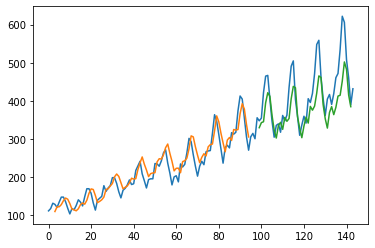

In [17]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [18]:
results = pd.DataFrame() # сводная таблица результатов
model = [] # шаг
train = [] # результат на трейне
test = [] # результат на тесте

In [19]:
model.append('Baseline')
train.append(round(trainScore, 2))
test.append(round(testScore,2))

#### 1. Попробуйте изменить параметры нейронной сети, работающей с датасетом imdb, либо нейронной сети, работающей airline-passengers (она прилагается вместе с датасетом к уроку в виде отдельного скрипта) так, чтобы улучшить её точность. Приложите анализ.

In [20]:
df = pd.read_csv("C:/Ангелина/Data Sience/4 четверть/Нейронные сети/5/airline-passengers.csv")
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [21]:
df.shape

(144, 2)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [23]:
df['Month'].value_counts()

1949-01    1
1949-02    1
1956-09    1
1956-10    1
1956-11    1
          ..
1953-01    1
1953-02    1
1953-03    1
1953-04    1
1960-12    1
Name: Month, Length: 144, dtype: int64

In [24]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [25]:
def parse_date(df, date_feature_name):
    date_list = df[date_feature_name]
    years = []
    months = []
    for el in date_list:
        years.append(el.year)
        months.append(el.month)
    df['year'] = years
    df['month'] = months
    
    return df

In [26]:
df = parse_date(df, 'Month')

In [27]:
df = df.iloc[:, 1:]
df.head()

,Passengers,year,month
0,112,1949,1
1,118,1949,2
2,132,1949,3
3,129,1949,4
4,121,1949,5


Выборка на обучение и тест.

In [28]:
train_size = 100

feat = ['Passengers', 'year', 'month']

bias = 5

train_data = df.iloc[:train_size][feat]
val_data = df.iloc[train_size + bias:][feat]

train_data.shape, val_data.shape

((100, 3), (39, 3))

In [29]:
features = train_data.columns[1:]
target = train_data.columns[0]

In [30]:
scaler = StandardScaler()

train_data[features] = scaler.fit_transform(train_data[features])
val_data[features] = scaler.transform(val_data[features])

train_data.head()

,Passengers,year,month
0,112,-1.525724,-1.534863
1,118,-1.525724,-1.247435
2,132,-1.525724,-0.960008
3,129,-1.525724,-0.672580
4,121,-1.525724,-0.385153


Генерация выборки

In [31]:
x_len = 3

future = 1

learning_rate = 0.001
batch_size = 8
epochs = 10

In [32]:
start = x_len + future
end = start + train_size

print(start, end)

X_train = train_data[features].values
y_train = df.iloc[start:end][target].values


x_end = len(val_data) - x_len - future
label_start = len(train_data) + bias + x_len + future
print(x_end, label_start)

X_val = val_data.iloc[:x_end][features].values
y_val = df.iloc[label_start:][target].values

4 104
35 109


In [33]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((100, 2), (100,), (35, 2), (35,))

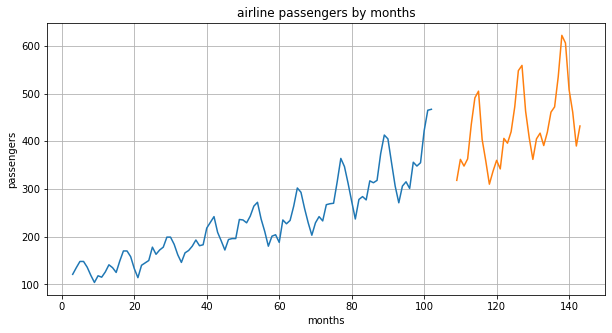

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(df.index[x_len:y_train.shape[0]+x_len],y_train[:])
plt.plot(df.index[y_train.shape[0]+x_len+bias+future:],y_val[:])
plt.grid('on')
plt.xlabel('months')
plt.ylabel('passengers')
plt.title('airline passengers by months')
plt.show()

In [35]:
dataset_train = timeseries_dataset_from_array(
    X_train,
    y_train,
    sequence_length=x_len,
    sampling_rate=1,
    batch_size=batch_size,
)

dataset_val = timeseries_dataset_from_array(
    X_val,
    y_val,
    sequence_length=x_len,
    sampling_rate=1,
    batch_size=batch_size,
)

In [36]:
for batch in dataset_train.take(1):
    inputs, targets = batch
    print("Input shape:", inputs.shape)
    print(inputs[1])
    print("Target shape:", targets.shape)
    print(targets[1])

Input shape: (8, 3, 2)
tf.Tensor(
[[-1.52572369 -1.24743549]
 [-1.52572369 -0.96000796]
 [-1.52572369 -0.67258043]], shape=(3, 2), dtype=float64)
Target shape: (8,)
tf.Tensor(135, shape=(), dtype=int64)


**LSTM**

In [37]:
model_1 = Sequential()

model_1.add(LSTM(32, input_shape=(inputs.shape[1], inputs.shape[2]),
               return_sequences=True))
model_1.add(Conv1D(32, 1, activation='linear'))
model_1.add(Flatten())
model_1.add(Dense(1, activation='linear'))

model_1.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 3, 32)             4480      
                                                                 
 conv1d (Conv1D)             (None, 3, 32)             1056      
                                                                 
 flatten (Flatten)           (None, 96)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 97        
                                                                 
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________


In [38]:
history_1 = model_1.fit(dataset_train,
                    epochs=epochs,
                    validation_data=dataset_val,
                    )

Epoch 1/10
13/13 [==============================] - 3s 47ms/step - loss: 56686.6562 - root_mean_squared_error: 238.0896 - val_loss: 193107.3281 - val_root_mean_squared_error: 439.4398
Epoch 2/10
13/13 [==============================] - 0s 9ms/step - loss: 56593.1328 - root_mean_squared_error: 237.8931 - val_loss: 192836.9219 - val_root_mean_squared_error: 439.1320
Epoch 3/10
13/13 [==============================] - 0s 9ms/step - loss: 56490.9453 - root_mean_squared_error: 237.6782 - val_loss: 192481.1406 - val_root_mean_squared_error: 438.7267
Epoch 4/10
13/13 [==============================] - 0s 9ms/step - loss: 56346.0312 - root_mean_squared_error: 237.3732 - val_loss: 191962.3594 - val_root_mean_squared_error: 438.1351
Epoch 5/10
13/13 [==============================] - 0s 9ms/step - loss: 56125.0938 - root_mean_squared_error: 236.9073 - val_loss: 191148.3281 - val_root_mean_squared_error: 437.2051
Epoch 6/10
13/13 [==============================] - 0s 9ms/step - loss: 55774.4375 -

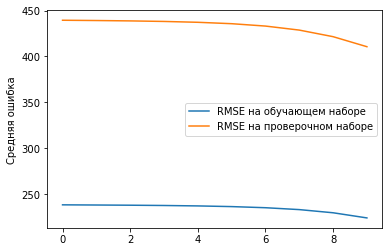

In [39]:
plt.plot(history_1.history['root_mean_squared_error'][:], 
         label='RMSE на обучающем наборе')
plt.plot(history_1.history['val_root_mean_squared_error'][:], 
         label='RMSE на проверочном наборе')

plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [40]:
hist_train_1 = history_1.history['root_mean_squared_error']
hist_val_1 = history_1.history['val_root_mean_squared_error']

In [41]:
num_iteration = 10

Epoch 1/10
13/13 [==============================] - 0s 9ms/step - loss: 46319.1484 - root_mean_squared_error: 215.2188 - val_loss: 156247.7812 - val_root_mean_squared_error: 395.2819
Epoch 2/10
13/13 [==============================] - 0s 9ms/step - loss: 41209.2812 - root_mean_squared_error: 203.0007 - val_loss: 141174.3125 - val_root_mean_squared_error: 375.7317
Epoch 3/10
13/13 [==============================] - 0s 8ms/step - loss: 34968.1055 - root_mean_squared_error: 186.9976 - val_loss: 124416.3594 - val_root_mean_squared_error: 352.7270
Epoch 4/10
13/13 [==============================] - 0s 8ms/step - loss: 28113.9863 - root_mean_squared_error: 167.6723 - val_loss: 107222.7969 - val_root_mean_squared_error: 327.4489
Epoch 5/10
13/13 [==============================] - 0s 9ms/step - loss: 21343.2754 - root_mean_squared_error: 146.0934 - val_loss: 90646.3047 - val_root_mean_squared_error: 301.0753
Epoch 6/10
13/13 [==============================] - 0s 9ms/step - loss: 15312.8486 - r

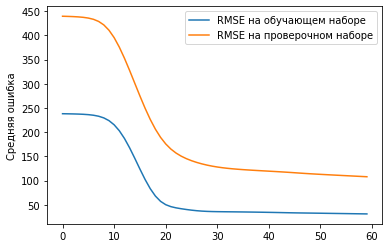

Epoch 1/10
13/13 [==============================] - 0s 10ms/step - loss: 958.7181 - root_mean_squared_error: 30.9632 - val_loss: 11525.7197 - val_root_mean_squared_error: 107.3579
Epoch 2/10
13/13 [==============================] - 0s 10ms/step - loss: 949.0325 - root_mean_squared_error: 30.8064 - val_loss: 11409.5547 - val_root_mean_squared_error: 106.8155
Epoch 3/10
13/13 [==============================] - 0s 8ms/step - loss: 939.4105 - root_mean_squared_error: 30.6498 - val_loss: 11293.8096 - val_root_mean_squared_error: 106.2723
Epoch 4/10
13/13 [==============================] - 0s 9ms/step - loss: 929.8495 - root_mean_squared_error: 30.4934 - val_loss: 11178.4307 - val_root_mean_squared_error: 105.7281
Epoch 5/10
13/13 [==============================] - 0s 9ms/step - loss: 920.3474 - root_mean_squared_error: 30.3372 - val_loss: 11063.3643 - val_root_mean_squared_error: 105.1825
Epoch 6/10
13/13 [==============================] - 0s 9ms/step - loss: 910.9008 - root_mean_squared_er

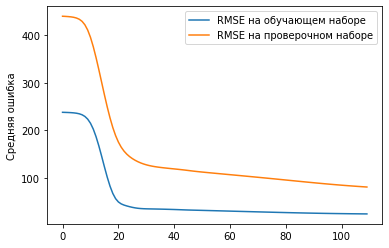

In [42]:
for iteration in range(num_iteration):
    history_1 = model_1.fit(dataset_train,
                    epochs=epochs,
                    validation_data=dataset_val,
                    )
    hist_val_1.extend(history_1.history['val_root_mean_squared_error'][:])
    hist_train_1.extend(history_1.history['root_mean_squared_error'][:])
    
    if (iteration + 1) % 5 == 0:
        plt.plot(hist_train_1, 
                 label='RMSE на обучающем наборе')
        plt.plot(hist_val_1, 
                 label='RMSE на проверочном наборе')

        plt.ylabel('Средняя ошибка')
        plt.legend()
        plt.show() 

In [43]:
pred_1 = model_1.predict(dataset_train).flatten()
pred_val_1 = model_1.predict(dataset_val).flatten()

5/5 [==============================] - 0s 3ms/step


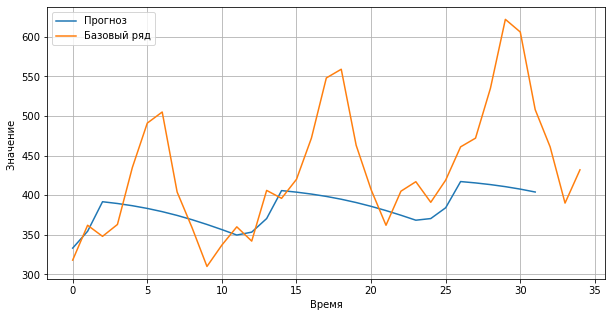

In [44]:
start = 0
step = 50
plt.figure(figsize=(10, 5))
plt.grid('on')
plt.plot(pred_val_1[future + start: future + start + step], 
         label='Прогноз')
plt.plot(y_val.flatten()[start: start+step], 
         label='Базовый ряд')
plt.xlabel('Время')
plt.ylabel('Значение ')

plt.legend()
plt.show()

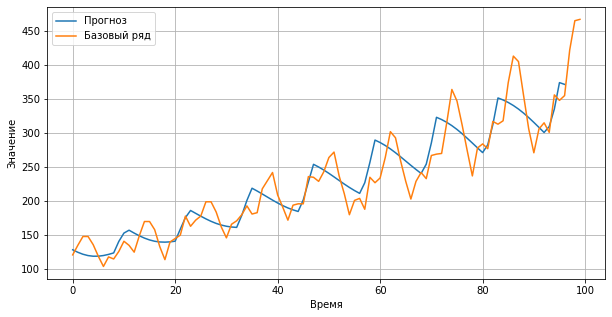

In [45]:
start = 0

plt.figure(figsize=(10, 5))
plt.grid('on')
plt.plot(pred_1[future + start: future + train_size], 
         label='Прогноз')
plt.plot(y_train.flatten()[start: train_size], 
         label='Базовый ряд')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.show()

In [46]:
train_loss_1, train_1 = model_1.evaluate(dataset_train)
test_loss_1, test_1 = model_1.evaluate(dataset_val)
print(f'train_loss: {train_loss_1}, train_m: {train_1}')
print(f'test_loss: {test_loss_1}, test_m: {test_1}')

model.append('LSTM')
train.append(round(train_1,2))
test.append(round(test_1,2))

5/5 [==============================] - 0s 6ms/step - loss: 6640.1777 - root_mean_squared_error: 81.4873
train_loss: 623.8995361328125, train_m: 24.977981567382812
test_loss: 6640.177734375, test_m: 81.48728942871094


**LSTM_tuned**

In [47]:
early_stop = EarlyStopping(monitor='val_root_mean_squared_error', patience=10)

model_2 = Sequential()

model_2.add(LSTM(32, input_shape=(inputs.shape[1], inputs.shape[2]),
                return_sequences=True))
model_2.add(LSTM(32, return_sequences=True))
model_2.add(Conv1D(64, 3, activation='linear'))
model_2.add(Conv1D(64, 1, activation='linear'))
model_2.add(Flatten())
model_2.add(Dense(3, activation='linear'))
model_2.add(Dense(1, activation='linear'))

model_2.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 3, 32)             4480      
                                                                 
 lstm_3 (LSTM)               (None, 3, 32)             8320      
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 64)             6208      
                                                                 
 conv1d_2 (Conv1D)           (None, 1, 64)             4160      
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
 dense_3 (Dense)             (None, 1)                

In [48]:
history_2 = model_2.fit(dataset_train,
                    epochs=epochs,
                    validation_data=dataset_val,
                    callbacks=[early_stop])

Epoch 1/10
13/13 [==============================] - 5s 73ms/step - loss: 56657.3281 - root_mean_squared_error: 238.0280 - val_loss: 193044.8438 - val_root_mean_squared_error: 439.3687
Epoch 2/10
13/13 [==============================] - 0s 10ms/step - loss: 56405.8789 - root_mean_squared_error: 237.4992 - val_loss: 192187.2500 - val_root_mean_squared_error: 438.3917
Epoch 3/10
13/13 [==============================] - 0s 11ms/step - loss: 55622.2227 - root_mean_squared_error: 235.8436 - val_loss: 189047.4844 - val_root_mean_squared_error: 434.7959
Epoch 4/10
13/13 [==============================] - 0s 12ms/step - loss: 52869.9844 - root_mean_squared_error: 229.9347 - val_loss: 177552.1406 - val_root_mean_squared_error: 421.3694
Epoch 5/10
13/13 [==============================] - 0s 11ms/step - loss: 43900.9492 - root_mean_squared_error: 209.5255 - val_loss: 140014.5312 - val_root_mean_squared_error: 374.1852
Epoch 6/10
13/13 [==============================] - 0s 10ms/step - loss: 21407.6

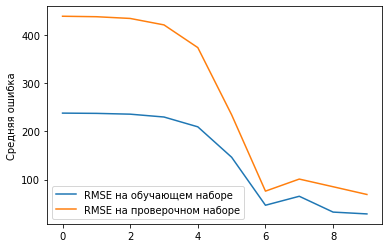

In [49]:
plt.plot(history_2.history['root_mean_squared_error'][:], 
         label='RMSE на обучающем наборе')
plt.plot(history_2.history['val_root_mean_squared_error'][:], 
         label='RMSE на проверочном наборе')

plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [50]:
hist_train_2 = history_2.history['root_mean_squared_error']
hist_val_2 = history_2.history['val_root_mean_squared_error']

Epoch 1/10
13/13 [==============================] - 0s 12ms/step - loss: 742.7281 - root_mean_squared_error: 27.2530 - val_loss: 5329.9497 - val_root_mean_squared_error: 73.0065
Epoch 2/10
13/13 [==============================] - 0s 10ms/step - loss: 741.9700 - root_mean_squared_error: 27.2391 - val_loss: 4946.5225 - val_root_mean_squared_error: 70.3315
Epoch 3/10
13/13 [==============================] - 0s 11ms/step - loss: 734.6971 - root_mean_squared_error: 27.1053 - val_loss: 4940.5034 - val_root_mean_squared_error: 70.2887
Epoch 4/10
13/13 [==============================] - 0s 11ms/step - loss: 719.0196 - root_mean_squared_error: 26.8145 - val_loss: 4969.3257 - val_root_mean_squared_error: 70.4934
Epoch 5/10
13/13 [==============================] - 0s 11ms/step - loss: 712.3680 - root_mean_squared_error: 26.6902 - val_loss: 4830.5972 - val_root_mean_squared_error: 69.5025
Epoch 6/10
13/13 [==============================] - 0s 10ms/step - loss: 704.0395 - root_mean_squared_error: 2

13/13 [==============================] - 0s 11ms/step - loss: 598.3094 - root_mean_squared_error: 24.4604 - val_loss: 3233.6738 - val_root_mean_squared_error: 56.8654
Epoch 8/10
13/13 [==============================] - 0s 11ms/step - loss: 596.8795 - root_mean_squared_error: 24.4311 - val_loss: 3215.3340 - val_root_mean_squared_error: 56.7039
Epoch 9/10
13/13 [==============================] - 0s 11ms/step - loss: 595.4193 - root_mean_squared_error: 24.4012 - val_loss: 3197.0005 - val_root_mean_squared_error: 56.5420
Epoch 10/10
13/13 [==============================] - 0s 11ms/step - loss: 593.9240 - root_mean_squared_error: 24.3706 - val_loss: 3178.6528 - val_root_mean_squared_error: 56.3795


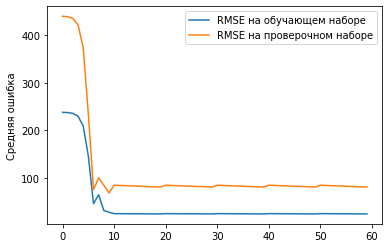

Epoch 1/10
13/13 [==============================] - 0s 11ms/step - loss: 592.3903 - root_mean_squared_error: 24.3391 - val_loss: 3160.2607 - val_root_mean_squared_error: 56.2162
Epoch 2/10
13/13 [==============================] - 0s 11ms/step - loss: 590.8129 - root_mean_squared_error: 24.3066 - val_loss: 3141.7986 - val_root_mean_squared_error: 56.0518
Epoch 3/10
13/13 [==============================] - 0s 10ms/step - loss: 589.1882 - root_mean_squared_error: 24.2732 - val_loss: 3123.2454 - val_root_mean_squared_error: 55.8860
Epoch 4/10
13/13 [==============================] - 0s 12ms/step - loss: 587.5109 - root_mean_squared_error: 24.2386 - val_loss: 3104.5720 - val_root_mean_squared_error: 55.7187
Epoch 5/10
13/13 [==============================] - 0s 11ms/step - loss: 585.7760 - root_mean_squared_error: 24.2028 - val_loss: 3085.7542 - val_root_mean_squared_error: 55.5496
Epoch 6/10
13/13 [==============================] - 0s 10ms/step - loss: 583.9774 - root_mean_squared_error: 2

13/13 [==============================] - 0s 12ms/step - loss: 257.7089 - root_mean_squared_error: 16.0533 - val_loss: 1409.0780 - val_root_mean_squared_error: 37.5377
Epoch 8/10
13/13 [==============================] - 0s 12ms/step - loss: 242.9387 - root_mean_squared_error: 15.5865 - val_loss: 1353.3405 - val_root_mean_squared_error: 36.7878
Epoch 9/10
13/13 [==============================] - 0s 13ms/step - loss: 229.3475 - root_mean_squared_error: 15.1442 - val_loss: 1302.6301 - val_root_mean_squared_error: 36.0920
Epoch 10/10
13/13 [==============================] - 0s 11ms/step - loss: 217.0657 - root_mean_squared_error: 14.7331 - val_loss: 1257.1775 - val_root_mean_squared_error: 35.4567


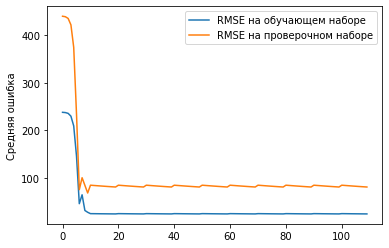

In [51]:
for iteration in range(num_iteration):
    history_2 = model_2.fit(dataset_train,
                    epochs=epochs,
                    validation_data=dataset_val,
                    callbacks=[early_stop])
    hist_val_2.extend(history_1.history['val_root_mean_squared_error'][:])
    hist_train_2.extend(history_1.history['root_mean_squared_error'][:])
    
    if (iteration + 1) % 5 == 0:
        plt.plot(hist_train_2, 
                 label='RMSE на обучающем наборе')
        plt.plot(hist_val_2, 
                 label='RMSE на проверочном наборе')

        plt.ylabel('Средняя ошибка')
        plt.legend()
        plt.show() 

In [52]:
pred_2 = model_2.predict(dataset_train).flatten()
pred_val_2 = model_2.predict(dataset_val).flatten()

5/5 [==============================] - 0s 6ms/step


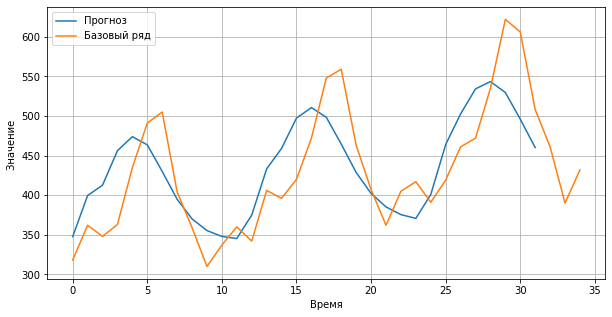

In [53]:
start = 0
step = 50
plt.figure(figsize=(10, 5))
plt.grid('on')
plt.plot(pred_val_2[future + start: future + start + step], 
         label='Прогноз')
plt.plot(y_val.flatten()[start: start+step], 
         label='Базовый ряд')
plt.xlabel('Время')
plt.ylabel('Значение ')

plt.legend()
plt.show()

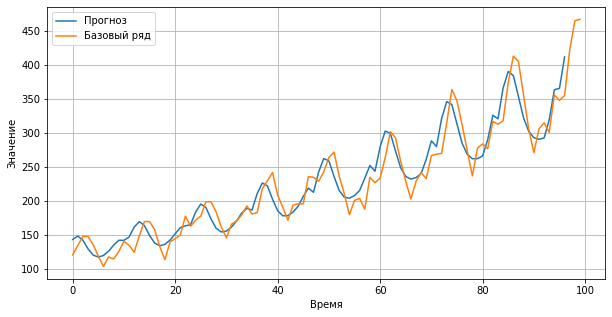

In [54]:
start = 0

plt.figure(figsize=(10, 5))
plt.grid('on')
plt.plot(pred_2[future + start: future + train_size], 
         label='Прогноз')
plt.plot(y_train.flatten()[start: train_size], 
         label='Базовый ряд')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.show()

In [55]:
train_loss_2, train_2 = model_2.evaluate(dataset_train)
test_loss_2, test_2 = model_2.evaluate(dataset_val)
print(f'train_loss: {train_loss_2}, train_m: {train_2}')
print(f'test_loss: {test_loss_2}, test_m: {test_2}')

model.append('LSTM_tuned')
train.append(round(train_2,2))
test.append(round(test_2,2))

5/5 [==============================] - 0s 5ms/step - loss: 1257.1775 - root_mean_squared_error: 35.4567
train_loss: 189.0155029296875, train_m: 13.748291015625
test_loss: 1257.177490234375, test_m: 35.45669937133789


In [56]:
results['model'] = model
results['train'] = train
results['test'] = test

In [57]:
results

,model,train,test
0,Baseline,25.78,59.39
1,LSTM,24.98,81.49
2,LSTM_tuned,13.75,35.46


**Вывод**  
Минимальная LSTM показывает результат хуже, чем базовая. При добавлении ещё одного слоя LSTM и добавив конвалюцию, далее растянув всё в один вектор и сделав полносвязанную классификацию, получили лучшый результат.

#### 2. Попробуйте изменить параметры нейронной сети, генерирующей текст таким образом, чтобы добиться генерации как можно более осмысленного текста. Пришлите лучший текст из получившихся и опишите предпринятые для его получения действия. Можно использовать текст другого произведения.

In [58]:
with open("C:/Ангелина/Data Sience/4 четверть/Нейронные сети/5/alice_in_wonderland.txt", 'rb') as _in:  
    lines = []
    for line in _in:
        line = line.strip().lower().decode("ascii", "ignore")
        if len(line) == 0:
            continue
        lines.append(line)
text = " ".join(lines)
chars = set([c for c in text])
nb_chars = len(chars)

char2index = {c: i for i, c in enumerate(chars)}
index2char = {i: c for i, c in enumerate(chars)}

SEQLEN, STEP = 100, 1
input_chars, label_chars = [], []

for i in range(0, len(text) - SEQLEN, STEP):
    input_chars.append(text[i: i + SEQLEN])
    label_chars.append(text[i + SEQLEN])
    
X = np.zeros((len(input_chars), SEQLEN, nb_chars), dtype=bool)
y = np.zeros((len(input_chars), nb_chars), dtype=bool)
for i, input_char in enumerate(input_chars):
    for j, ch in enumerate(input_char):
        X[i, j, char2index[ch]] = 1
    y[i, char2index[label_chars[i]]] = 1
    
BATCH_SIZE, HIDDEN_SIZE = 128, 128
NUM_ITERATIONS = 5 
NUM_EPOCHS_PER_ITERATION = 20 
NUM_PREDS_PER_EPOCH = 20 

model = Sequential()
model.add(
    GRU(  
        HIDDEN_SIZE,
        return_sequences=False,
        input_shape=(SEQLEN, nb_chars),
        unroll=True
    )
)
model.add(Dense(nb_chars))
model.add(Activation("softmax"))
model.compile(loss="categorical_crossentropy", optimizer="rmsprop")

# выполнение серий тренировочных и демонстрационных итераций 
for iteration in range(NUM_ITERATIONS):
    
    # для каждой итерации запуск передачи данных в модель 
    print("=" * 50)
    print("Итерация #: %d" % (iteration))
    model.fit(X, y, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS_PER_ITERATION)
    
    test_idx = np.random.randint(len(input_chars))
    test_chars = input_chars[test_idx]
    
    print("Генерация из посева: %s" % (test_chars))
    print(test_chars, end="")
    for i in range(NUM_PREDS_PER_EPOCH):
        X_test = np.zeros((1, SEQLEN, nb_chars))
        for j, ch in enumerate(test_chars):
            X_test[0, j, char2index[ch]] = 1
        
        # осуществление предсказания с помощью текущей модели.
        pred = model.predict(X_test, verbose=0)[0]
        y_pred = index2char[np.argmax(pred)]
        
        # вывод предсказания добавленного к тестовому примеру 
        print(y_pred, end="")
        
        # инкрементация тестового примера содержащего предсказание
        test_chars = test_chars[1:] + y_pred
        
print()        

Итерация #: 0
Epoch 1/20
1240/1240 [==============================] - 157s 110ms/step - loss: 2.3384
Epoch 2/20
1240/1240 [==============================] - 140s 113ms/step - loss: 1.9681
Epoch 3/20
1240/1240 [==============================] - 134s 108ms/step - loss: 1.8104
Epoch 4/20
1240/1240 [==============================] - 134s 108ms/step - loss: 1.6955
Epoch 5/20
1240/1240 [==============================] - 142s 114ms/step - loss: 1.6086
Epoch 6/20
1240/1240 [==============================] - 140s 113ms/step - loss: 1.5406
Epoch 7/20
1240/1240 [==============================] - 141s 113ms/step - loss: 1.4839
Epoch 8/20
1240/1240 [==============================] - 140s 113ms/step - loss: 1.4366
Epoch 9/20
1240/1240 [==============================] - 144s 116ms/step - loss: 1.3965
Epoch 10/20
1240/1240 [==============================] - 145s 117ms/step - loss: 1.3617
Epoch 11/20
1240/1240 [==============================] - 142s 114ms/step - loss: 1.3311
Epoch 12/20
1240/1240 [====

**Вывод**  
Были изменены гиперпараметры модели, такие как количество эпох и количество предсказаний в эпоху. Данные изменения дали положительный результат. Генерируемый моделью текст стал более осмысленным.

#### 4. Предложите свои варианты решения проблемы исчезающего градиента в RNN.

Для обучения RNN используется специальный вариант техники обратного распространения ошибки - по времени (Backpropogation Through Time, BPTT). Из-за этого имеется проблема исчезающего градиента в RNN. Во время обратного распространения ошибки обновление веса будет очень маленьким от слоя к слою, и в какой-то момент новый вес, который нужно добавить, станет равным старому весу, поэтому изменений нет, и обучение сети затруднено.

LSTM и GRU решают проблему исчезновения градиентов, так как у них есть внутренние механизмы, называемые ворота (gate), которые могут регулировать поток информации.

В LTSM:
Ворота забывания (forget gate) решают, что следует сохранить от предыдущих шагов.

Входные ворота (input gate) решают, какую информацию добавить к текущему шагу.

Выходные ворота (output gate) определяют, каким должно быть следующее скрытое состояние.

В GRU есть только два типа ворот:
Ворота обновления (update gate) действуют аналогично воротам забывания и входным воротам в LSTM, они решают, какую информацию сохранить, а какую выбросить, и какую новую информацию добавить.

Ворота сброса (reset gate) используются, чтобы решить, какую часть прошлой информации следует забыть.

С помощью вышеуказанных механизмов информация сохраняется для последующего использования, тем самым предотвращая постепенное затухание старых сигналов во время обработки.